# Segment-anything demo

## 0. Object auto segmentation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels == 1]
    neg_points = coords[labels == 0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))


sam_checkpoint = "./ckpts/sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

/home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
# Object Tracking
from tqdm import tqdm
tracks = {}
img_path = '/home/guan/codes/humannerf/dataset/student_2/images'
img_list = sorted(os.listdir(img_path))
tracker = cv2.legacy.TrackerCSRT_create()
roi = None
for img_file in tqdm(img_list):
    img_rpath = os.path.join(img_path, img_file)
    org_image = cv2.imread(img_rpath)
    image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
    if roi is None:
        roi = cv2.selectROI("Frame", image, fromCenter=False, showCrosshair=True)
        tracker.init(image, roi)
    else:
        (_, roi) = tracker.update(image)
    (x, y, w, h) = [int(v) for v in roi]
    tracks[img_file] = [(2 * x + w) / 2, (2 * y + h) / 2]
# Auto Segmentation
img_list = sorted(os.listdir(img_path))
for img_file in tqdm(img_list):
    img_rpath = os.path.join(img_path, img_file)
    org_image = cv2.imread(img_rpath)
    image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image)
    
    axis = tracks[img_file]
    input_point = np.array([axis])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    mask_img = masks[2] * 255
    plt.imsave(img_rpath.replace('images', 'masks'), mask_img, cmap='gray')
#Post Processing
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter


mask_dir = img_path.replace('images', 'masks')
new_dir = img_path.replace('/images', '')
mask_list = os.listdir(mask_dir)
mask_list = sorted(mask_list)
for mask in mask_list:
    print(f'Processing on {mask}')
    msk = Image.open(os.path.join(mask_dir, mask))
    msk = msk.filter(ImageFilter.ModeFilter(size=13))
    msk = np.array(msk)[:, :, 0]
    kernel = np.ones((5, 5), dtype=np.uint8)
    msk = cv2.erode(msk, kernel, iterations=3)
    msk = cv2.dilate(msk, kernel, iterations=3)
    plt.imsave(os.path.join(new_dir, mask), msk, cmap='gray')

  0%|                                                                                                                                      | 0/128 [00:00<?, ?it/s]QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Cannot move to target thread (0x557a46fc5520)

QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Cannot move to target thread (0x557a46fc5520)

QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Cannot move to target thread (0x557a46fc5520)

QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Cannot move to target thread (0x557a46fc5520)

QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Cannot move to target thread (0x557a46fc5520)

QObject::moveToThread: Current thread (0x557a46fc5520) is not the object's thread (0x557a4580bf10).
Ca

  0%|                                                                                                                                      | 0/128 [00:00<?, ?it/s]

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [01:33<00:00,  1.37it/s]


Processing on frame_000001.png
Processing on frame_000002.png
Processing on frame_000003.png
Processing on frame_000004.png
Processing on frame_000005.png
Processing on frame_000006.png
Processing on frame_000007.png
Processing on frame_000008.png
Processing on frame_000009.png
Processing on frame_000010.png
Processing on frame_000011.png
Processing on frame_000012.png
Processing on frame_000013.png
Processing on frame_000014.png
Processing on frame_000015.png
Processing on frame_000016.png
Processing on frame_000017.png
Processing on frame_000018.png
Processing on frame_000019.png
Processing on frame_000020.png
Processing on frame_000021.png
Processing on frame_000022.png
Processing on frame_000023.png
Processing on frame_000024.png
Processing on frame_000025.png
Processing on frame_000026.png
Processing on frame_000027.png
Processing on frame_000028.png
Processing on frame_000029.png
Processing on frame_000030.png
Processing on frame_000031.png
Processing on frame_000032.png
Processi

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [01:22<00:00,  1.23s/it]


## 1. Object mask from prompt

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [3]:
sam_checkpoint = "./ckpts/sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

/home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


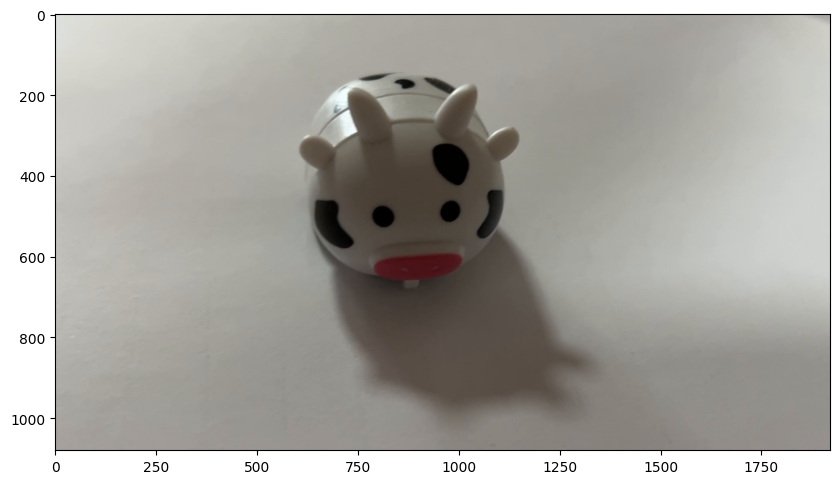

In [20]:
img_path = '/home/guan/codes/humannerf/dataset/cow/images/frame_000006.png'
org_image = cv2.imread(img_path)
image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()
predictor.set_image(image)

axis get at (845, 227)


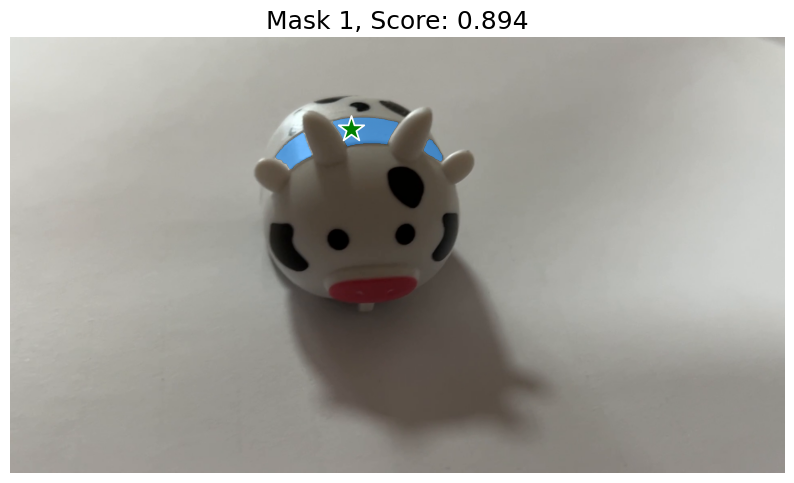

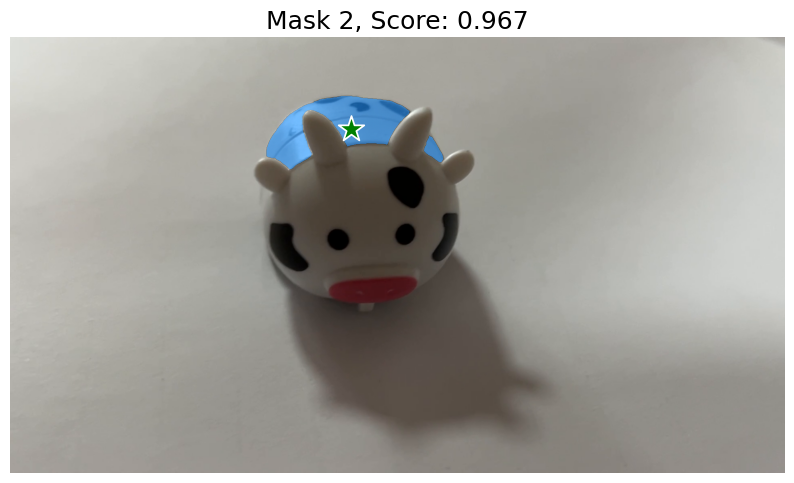

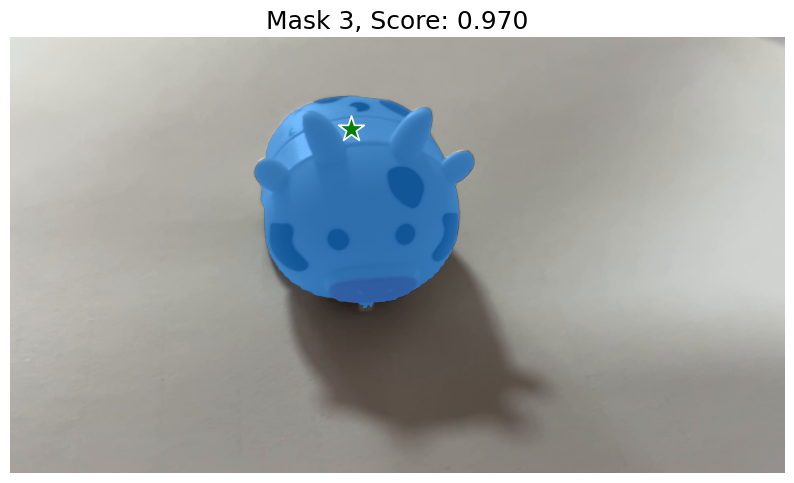

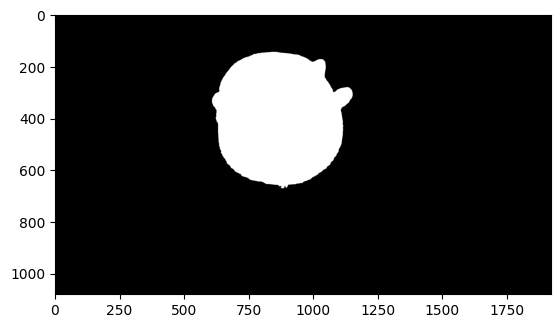

In [21]:
axis = []
cv2.namedWindow('image')
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    global axis
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d, %d" % (x, y)
        print(f"axis get at ({xy})")
        axis = [x, y]
xy = cv2.setMouseCallback('image', on_EVENT_LBUTTONDOWN)
while(1):
    cv2.imshow('image', org_image)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
input_point = np.array([axis])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
mask_img = masks[2] * 255
plt.imshow(mask_img, cmap='gray')
plt.imsave(img_path.replace('images', 'masks'), mask_img, cmap='gray')

## 2. Batch Generation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels == 1]
    neg_points = coords[labels == 0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))


sam_checkpoint = "./ckpts/sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

/home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/guan/anaconda3/envs/segment/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [4]:
img_path = '/home/guan/codes/humannerf/dataset/cow/images'
img_list = sorted(os.listdir(img_path))
for img_file in img_list:
    img_rpath = os.path.join(img_path, img_file)
    org_image = cv2.imread(img_rpath)
    image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image)
    
    axis = []
    cv2.namedWindow(img_file)
    cv2.resizeWindow(img_file, 30, 30)
    def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
        global axis
        if event == cv2.EVENT_LBUTTONDOWN:
            xy = "%d, %d" % (x, y)
            print(f"axis get at ({xy})")
            axis = [x, y]
    
    xy = cv2.setMouseCallback(img_file, on_EVENT_LBUTTONDOWN)
    while (1):
        cv2.imshow(img_file, org_image)
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    input_point = np.array([axis])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    mask_img = masks[2] * 255
    plt.imsave(img_rpath.replace('images', 'masks'), mask_img, cmap='gray')

axis get at (943, 378)
axis get at (868, 373)
axis get at (912, 371)
axis get at (922, 328)
axis get at (855, 399)
axis get at (823, 430)
axis get at (713, 344)
axis get at (495, 380)
axis get at (642, 341)
axis get at (750, 483)
axis get at (757, 457)
axis get at (800, 385)
axis get at (740, 394)
axis get at (912, 476)
axis get at (1143, 522)
axis get at (1039, 423)
axis get at (1068, 489)
axis get at (1010, 496)
axis get at (1027, 496)
axis get at (1043, 469)
axis get at (963, 393)
axis get at (937, 367)
axis get at (824, 332)
axis get at (811, 342)
axis get at (1003, 476)
axis get at (962, 442)
axis get at (936, 337)
axis get at (974, 300)
axis get at (1222, 323)
axis get at (1236, 330)
axis get at (1184, 323)
axis get at (1075, 249)
axis get at (973, 214)
axis get at (945, 250)
axis get at (1136, 243)
axis get at (1100, 257)
axis get at (1210, 283)
axis get at (1114, 262)
axis get at (1119, 256)
axis get at (1106, 241)
axis get at (1095, 228)
axis get at (1129, 218)
axis get at (11

In [24]:
### Contour Smoothing
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter


mask_dir = '/home/guan/codes/humannerf/dataset/cow/masks'
new_dir = '/home/guan/codes/humannerf/dataset/cow'
mask_list = os.listdir(mask_dir)
mask_list = sorted(mask_list)
for mask in mask_list:
    print(f'Processing on {mask}')
    msk = Image.open(os.path.join(mask_dir, mask))
    msk = msk.filter(ImageFilter.ModeFilter(size=13))
    msk = np.array(msk)[:, :, 0]
    kernel = np.ones((5, 5), dtype=np.uint8)
    msk = cv2.erode(msk, kernel, iterations=1)
    msk = cv2.dilate(msk, kernel, iterations=1)
    plt.imsave(os.path.join(new_dir, mask), msk, cmap='gray')

Processing on frame_000001.png
Processing on frame_000002.png
Processing on frame_000003.png
Processing on frame_000004.png
Processing on frame_000005.png
Processing on frame_000006.png
Processing on frame_000007.png
Processing on frame_000008.png
Processing on frame_000009.png
Processing on frame_000010.png
Processing on frame_000011.png
Processing on frame_000012.png
Processing on frame_000013.png
Processing on frame_000014.png
Processing on frame_000015.png
Processing on frame_000016.png
Processing on frame_000017.png
Processing on frame_000018.png
Processing on frame_000019.png
Processing on frame_000020.png
Processing on frame_000021.png
Processing on frame_000022.png
Processing on frame_000023.png
Processing on frame_000024.png
Processing on frame_000025.png
Processing on frame_000026.png
Processing on frame_000027.png
Processing on frame_000028.png
Processing on frame_000029.png
Processing on frame_000030.png
Processing on frame_000031.png
Processing on frame_000032.png
Processi

In [3]:
### Check
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

mask_dir = '/home/guan/codes/humannerf/dataset/woman/masks'
img_dir = mask_dir.replace('masks', 'images')
mask_files = sorted(os.listdir(mask_dir))
file_num = len(mask_files)
plt.figure(figsize=(50, 600))
row_num = file_num // 5 if (file_num % 5 == 0) else (file_num // 5 + 1)
for i, mask_file in enumerate(mask_files):
    img = np.array(cv2.imread(os.path.join(img_dir, mask_file)))
    mask = np.array(cv2.imread(os.path.join(mask_dir, mask_file), cv2.IMREAD_GRAYSCALE))
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 0, 255), 5)
    img = img[:, :, ::-1]
    img[..., 2] = np.where(mask == 1, 255, img[..., 2])
    img = img.tolist()
    title = mask_file.split('.')[0]
    plt.subplot(row_num,5,i+1)
    plt.imshow(img)
    plt.title(title,fontsize=30)
    plt.xticks([])
    plt.yticks([])
plt.show()

KeyboardInterrupt: 

## 3. Automatic mask generation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [3]:
org_image = cv2.imread('./test-cases/dining_hall.jpg')
image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)

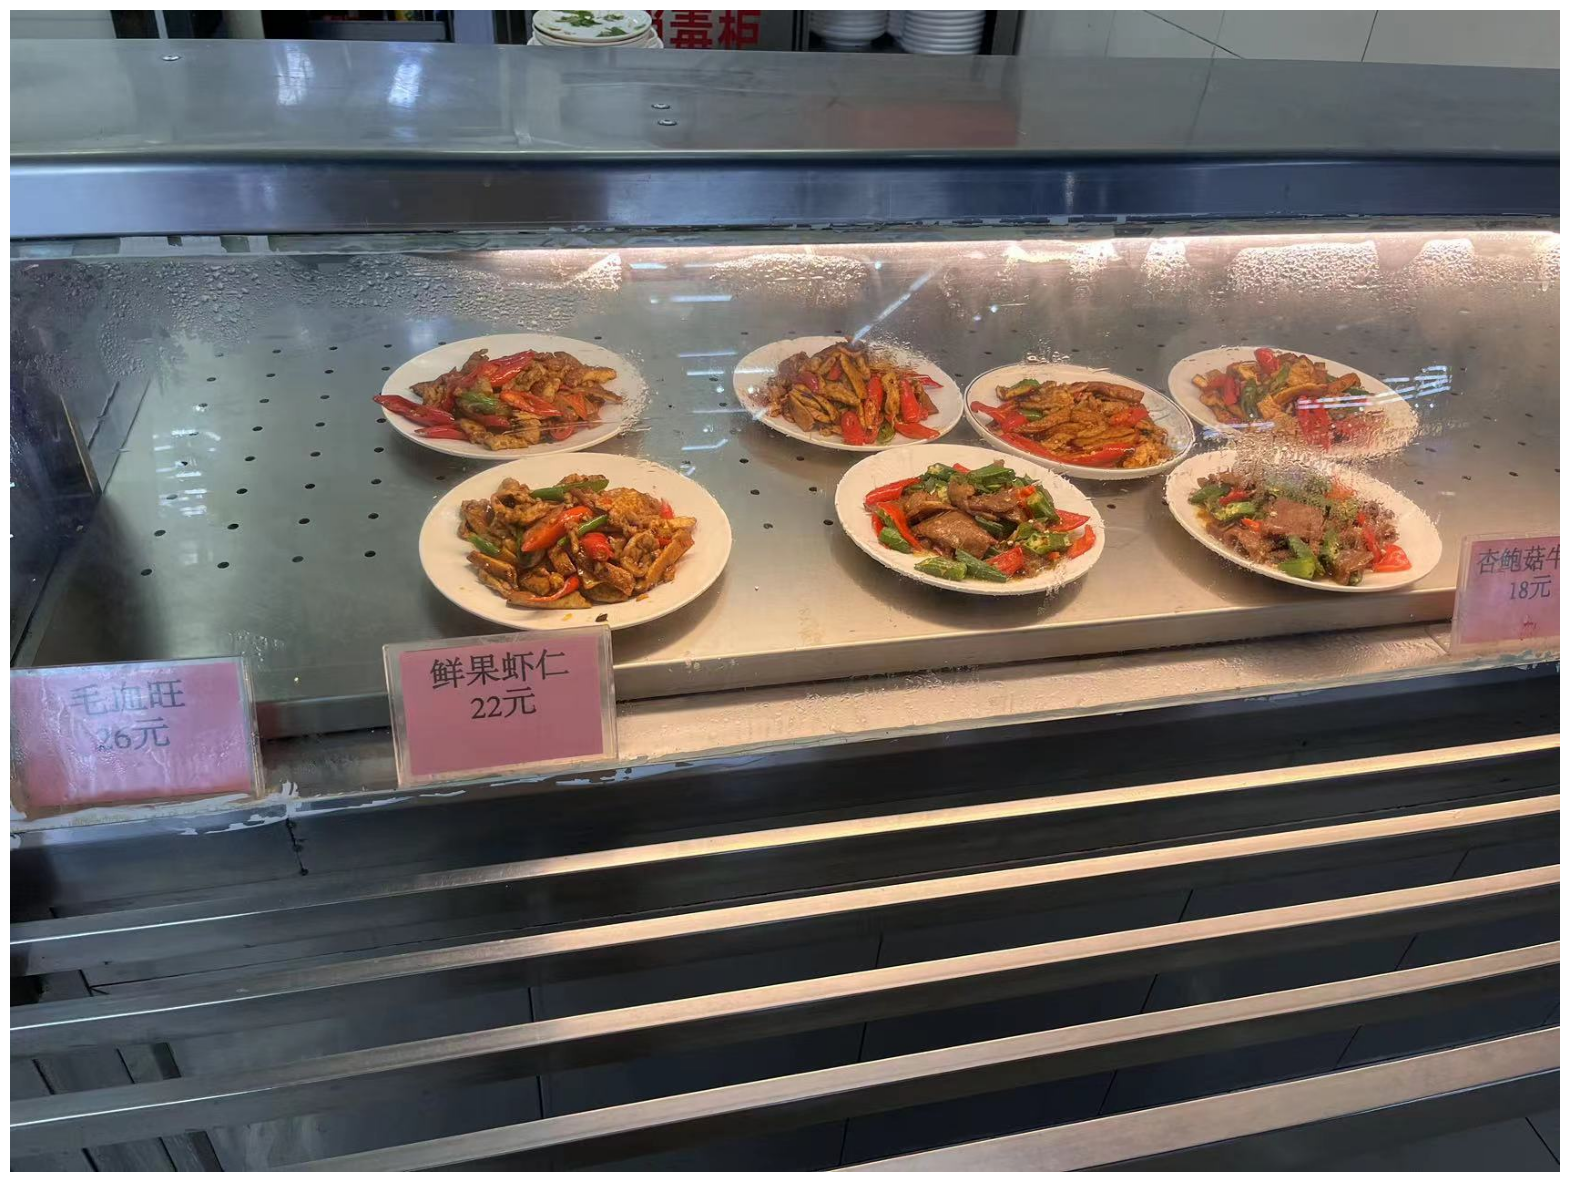

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
sam_checkpoint = "./ckpts/sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

In [6]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [7]:
masks = mask_generator.generate(image)

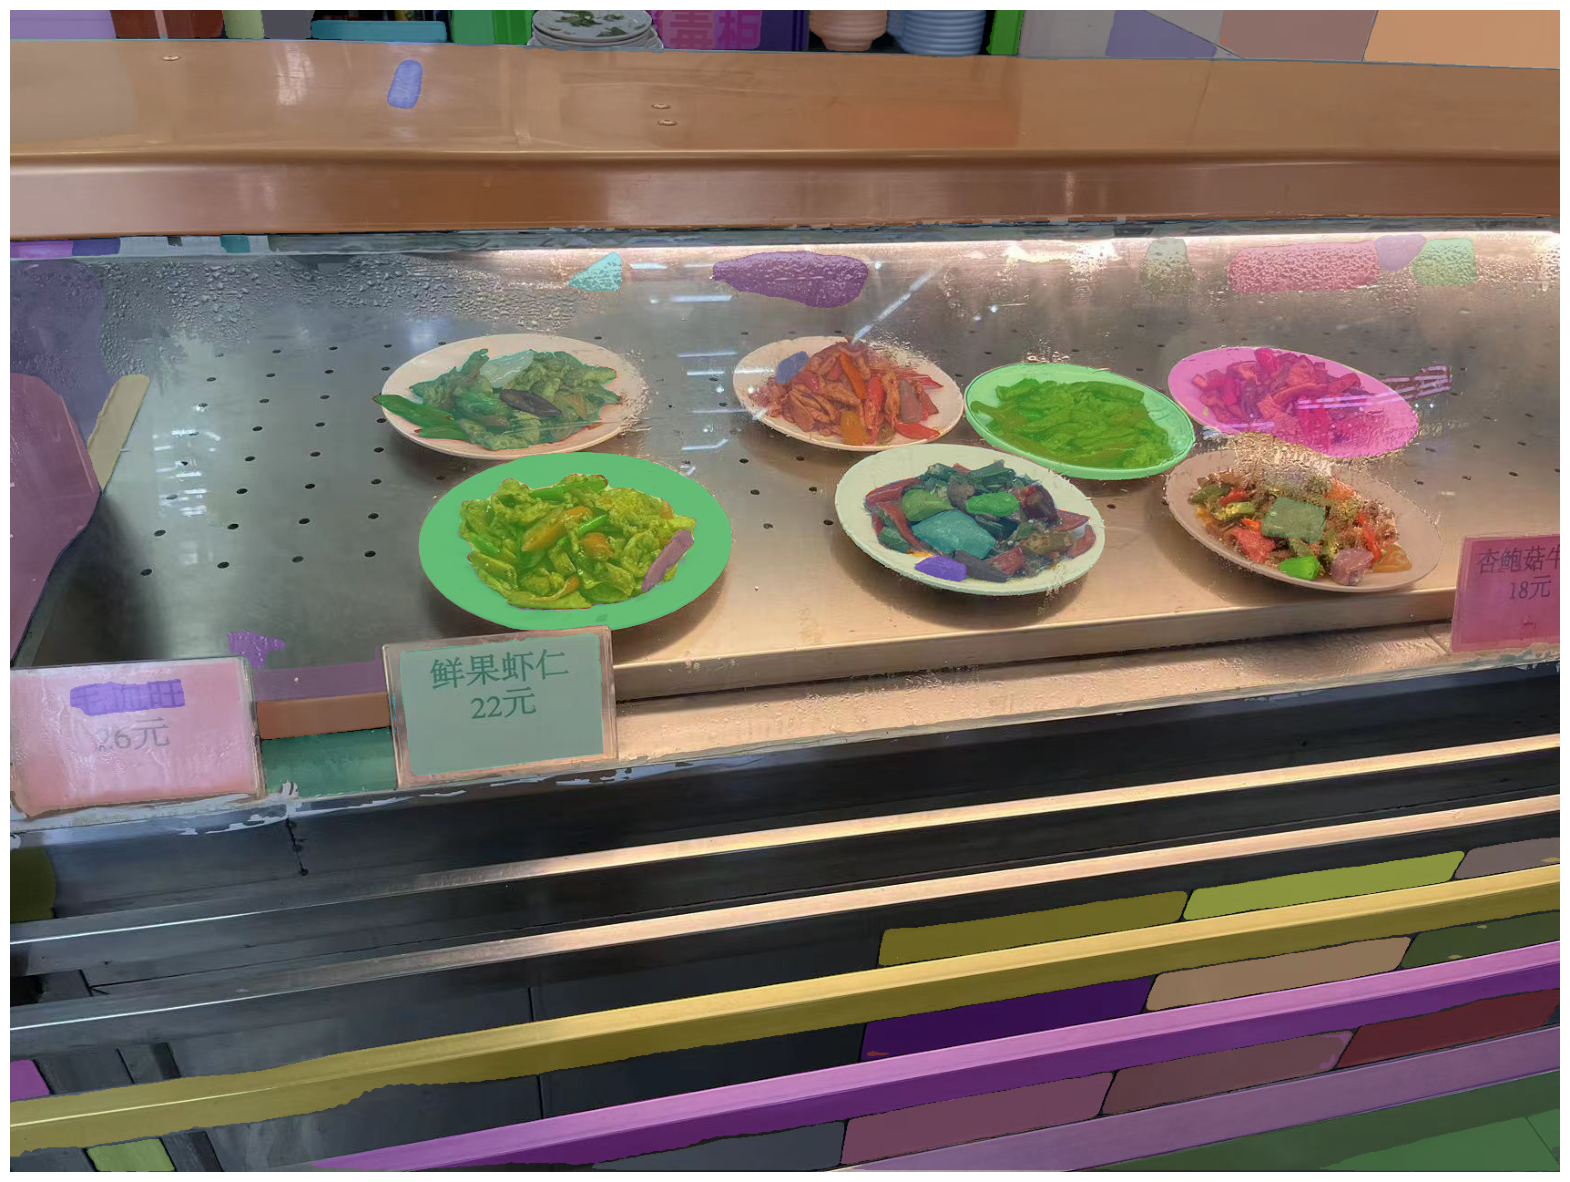

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 